In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
df= pd.read_csv("/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
d = df.director.value_counts().sort_values(ascending = False)[0:6]
fig = px.bar(d, x=d.index, y=d.values,width=900,height=600,template="plotly_dark",title = "Directors")
fig.update_yaxes(title_text="Count")
fig.show()

#### No null values were detected instead "Not Given" values are detected

In [5]:
cols = []
percents = []
for i in df.columns:
    x = len(df[df[i] == "Not Given"])/df.shape[0]
    if(x) >0:
        cols.append(i)
        percents.append(x*100)

In [6]:
fig = px.bar(y = cols,x = percents,orientation='h',template="plotly_dark",title = 'Missing Values')
fig.update_yaxes(title_text="Column",)
fig.update_xaxes(title_text="% of Missing values",)

In [7]:
df['director'] = df['director'].replace('Not Given', np.nan)

In [8]:
df['country'] = df['country'].replace('Not Given', np.nan)

In [9]:
df = df.dropna()

In [10]:
df["show_id"].duplicated().sum()

0

In [11]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
6565,s3351,Movie,True: Grabbleapple Harvest,"Mark Thornton, Todd Kauffman",Canada,11/1/2019,2019,TV-Y,24 min,Children & Family Movies
6566,s3509,Movie,True: Tricky Treat Day,"Mark Thornton, Todd Kauffman",Canada,9/20/2019,2019,TV-Y,24 min,Children & Family Movies
6567,s3554,TV Show,True and the Rainbow Kingdom,"Mark Thornton, Todd Kauffman",United States,8/30/2019,2019,TV-Y,3 Seasons,Kids' TV
6568,s4241,Movie,Sam Kinison: The Scream Continues,Walter C. Miller,United States,12/31/2018,2016,TV-MA,29 min,Documentaries


In [12]:
d = df.director.value_counts().sort_values(ascending = False)[0:6]
fig = px.bar(d, x=d.index, y=d.values,width=900,height=600,template="plotly_dark",title = "Directors")
fig.update_yaxes(title_text="Count")
fig.show()

In [13]:
df = df.drop("date_added", axis = 1)

In [14]:
years  = df["release_year"].value_counts().sort_index(ascending = False)[:20]
fig = px.line(years, x= years.index, y=years.values,template="plotly_dark", title = "Number of Movies added for every year in the last 20 years")
fig.show()

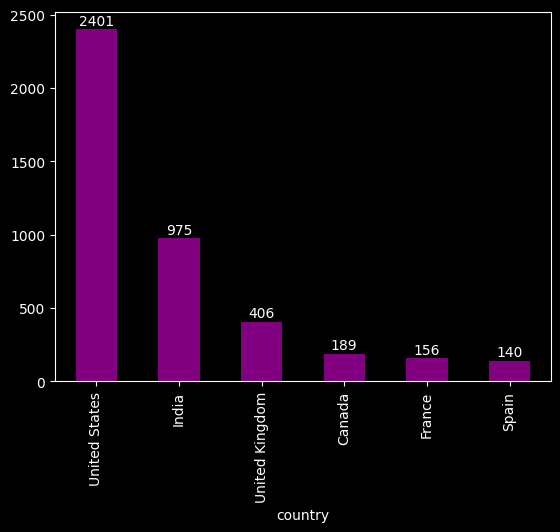

In [15]:
plt.style.use('dark_background')
ax = df.country.value_counts()[:6].plot(kind='bar',color = 'purple')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')

plt.show()

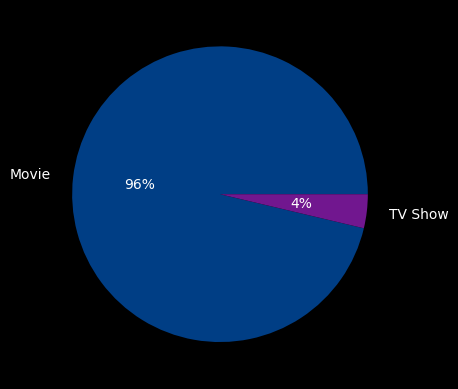

In [16]:
m = df['type'].value_counts()
labels = m.index

# Define custom colors for the pie chart
colors = ['#003e85','#71178f']

# Create the pie chart with custom colors
plt.pie(m, labels=labels, autopct='%1.0f%%', pctdistance=0.55, labeldistance=1.15, colors=colors)

# Display the pie chart
plt.show()

In [17]:
for x in range(6570):
    try:
        value = str(df.loc[x, 'duration'])
    except KeyError:
        continue
    if value[-6:] == "Season" or value[-7:] == "Seasons":
        df.loc[x, 'New_duration'] = value
    elif value[-3:] == "min":
        try:
            duration = int(value.split()[0])
            if duration < 60:
                df.loc[x, 'New_duration'] = 'less than 1 hour'
            elif duration < 91:
                df.loc[x, 'New_duration'] = '1-1.5 hours'
            elif duration < 121:
                df.loc[x, 'New_duration'] = '1.5-2 hours'
            else:
                df.loc[x, 'New_duration'] = 'more than 2 hours'
        except ValueError:
            df.loc[x, 'New_duration'] = 'Unknown duration'
    else:
        df.loc[x, 'New_duration'] = 'Unknown duration'


In [18]:
df

,show_id,type,title,director,country,release_year,rating,duration,listed_in,New_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,1-1.5 hours
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1 Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1 Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,"Children & Family Movies, Comedies",1.5-2 hours
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",more than 2 hours
...,...,...,...,...,...,...,...,...,...,...
6565,s3351,Movie,True: Grabbleapple Harvest,"Mark Thornton, Todd Kauffman",Canada,2019,TV-Y,24 min,Children & Family Movies,less than 1 hour
6566,s3509,Movie,True: Tricky Treat Day,"Mark Thornton, Todd Kauffman",Canada,2019,TV-Y,24 min,Children & Family Movies,less than 1 hour
6567,s3554,TV Show,True and the Rainbow Kingdom,"Mark Thornton, Todd Kauffman",United States,2019,TV-Y,3 Seasons,Kids' TV,3 Seasons
6568,s4241,Movie,Sam Kinison: The Scream Continues,Walter C. Miller,United States,2016,TV-MA,29 min,Documentaries,less than 1 hour


Text(0, 0.5, 'Count')

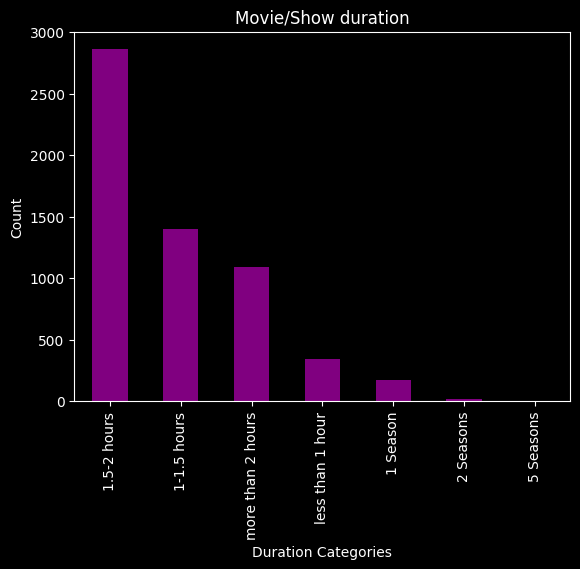

In [19]:
fig=df.New_duration.value_counts(ascending=False)[:7].plot(
    kind="bar", 
    color="purple", 
    title='Movie/Show duration'
)
plt.xlabel('Duration Categories')
plt.ylabel("Count")

Text(0, 0.5, 'Count')

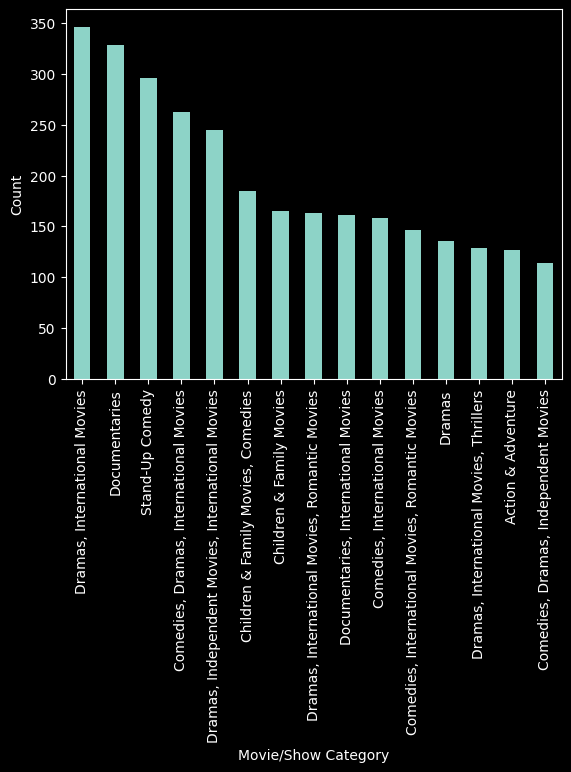

In [20]:
df.listed_in.value_counts(ascending = False)[:15].plot(kind= "bar")
plt.xlabel("Movie/Show Category")
plt.ylabel("Count")